# BASE MODEL: Autoregressive , Moving Average , And ARIMA

In [186]:
import tensorflow as tf
print(tf.__version__)

0.11.0


In [187]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
#from tensorflow.nn.rnn import *
from tensorflow.python.ops  import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [188]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.python.framework import dtypes

import seaborn as sns

In [189]:
cd /

/


In [190]:
cd Users/Seychelles/Desktop/GoogleTensorflow/Data_Collector/CSV_file_from_2007_to_2017/

/Users/Seychelles/Desktop/GoogleTensorflow/Data_Collector/CSV_file_from_2007_to_2017


In [191]:
DataKarpos = pd.read_csv('Arima.csv') # Only Karpos Location is used here . Other locations are zero

In [192]:
DataKarpos[1:2]

,Unnamed: 0,date,PM10,NAME,PM10_null_pointers,CO,CO_null_pointers,NO2,NO2_null_pointers,O3,...,daysInterval,days_interval,hour_interval,Centar,Gazi Baba,Karpos,Lisice,Miladinovci,Mrsevci,Rektorat
1,10,2007-01-02 00:00:00,0.950396,Karpos,1,0.33293,1,NaN,0,-0.094688,...,0 days 00:00:00.000000000,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [193]:
TargetKarpos = DataKarpos[['PM10']].copy(deep=True) # copy PM10 data out from data sets

# Analysis Of Misiing Values

In [194]:
Target = DataKarpos[['PM10']].copy(deep=True)

In [195]:
Target.shape

(89500, 1)

In [196]:
null_data_PM10 = Target[Target.isnull().any(axis=1)] # extract data sets with null values

In [197]:
null_data_PM10.to_csv("PM10_NUll.txt")# save to file

In [198]:
Target.to_csv("R_target.csv")# save to file

In [199]:
null_data_PM10.head()

,PM10
168,NaN
169,NaN
170,NaN
171,NaN
172,NaN


In [200]:
def getPctMissing(series):
    '''
    Returns percentage of Missing data in a data set.
    Input : Pandas series
    Output: Percentage of missing data in data set
    '''
    num = series.isnull().sum()
    Total_data = len(series)
    return 100*(num/Total_data)

In [201]:
print("Number of null values in PM10 : ");Target.isnull().sum()

Number of null values in PM10 : 


PM10    28871
dtype: int64

In [202]:
print("Number of non null values in PM10 : ");Target.count()

Number of non null values in PM10 : 


PM10    60629
dtype: int64

In [203]:
print("Percentage of Missing Value: "); getPctMissing(Target)

Percentage of Missing Value: 


PM10    32.258101
dtype: float64

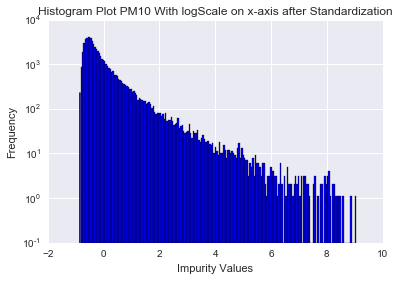

In [204]:
fig, ax = plt.subplots()
DataKarpos.PM10.hist(ax=ax,bins=200,color='blue',bottom=0.1)
ax.set_yscale('log')
#ax.set_yscale('log')
#ax.set_xscale('log')
#plt.hist(PM10_cox, bins='auto')  # plt.hist passes it's arguments to np.histogram

plt.title("Histogram Plot PM10 With logScale on x-axis after Standardization")
plt.ylabel("Frequency")
plt.xlabel("Impurity Values")
plt.show()

# Fill Missing Values With Nan

In [148]:
pwd

'/Users/Seychelles/Desktop/GoogleTensorflow/Data_Collector/CSV_file_from_2007_to_2017'

In [205]:
Target.fillna(0,inplace=True) # Fill Missing value with 0. Default model

In [206]:
Data = pd.read_csv('ItemListWithDummy.csv')

In [207]:
x_axis = Data['date'] # collect date from data frame

In [208]:
x_axis = pd.to_datetime(x_axis) # convert to date time

#  Test Stationarity


In [209]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

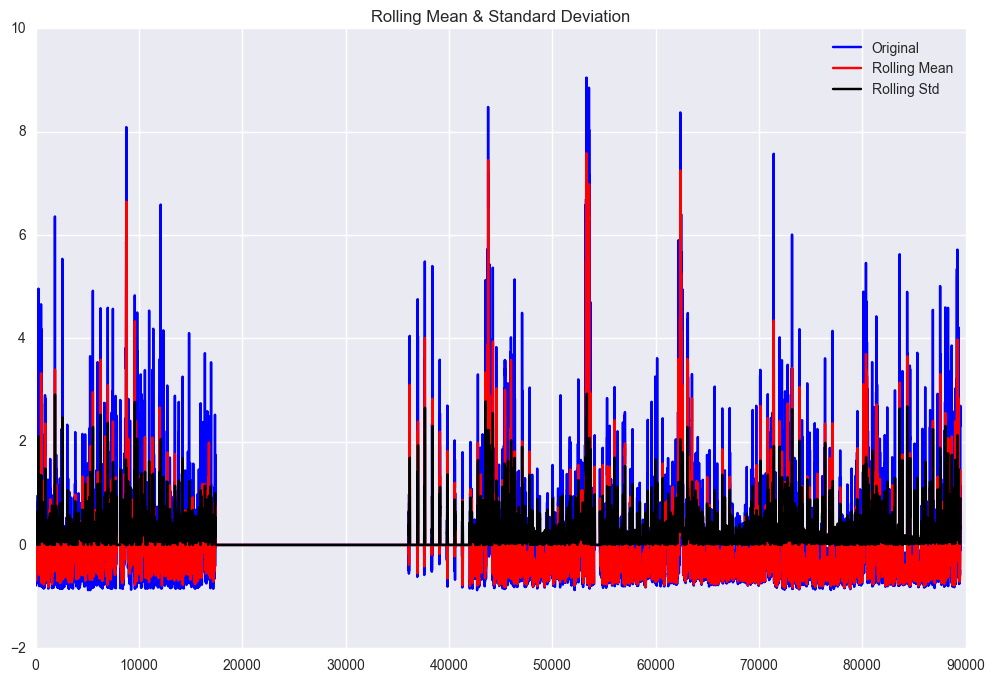

Results of Dickey-Fuller Test:
Test Statistic                   -21.629152
p-value                            0.000000
#Lags Used                        66.000000
Number of Observations Used    89433.000000
Critical Value (10%)              -2.566787
Critical Value (5%)               -2.861572
Critical Value (1%)               -3.430423
dtype: float64


In [32]:
test_stationarity(Target.PM10) 

In [39]:
# Test statistic is less than the critical value. So data not stationary

False

# Eliminate trend : Using Weighted moving average

//anaconda/envs/seychelles/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(ignore_na=False,min_periods=0,adjust=True,halflife=12).mean()
  if __name__ == '__main__':


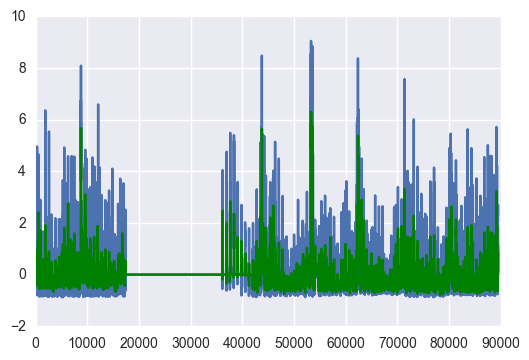

In [29]:
Weighted_moving_avg = pd.ewma(Target.PM10, halflife=12)
plt.plot(Target.PM10)
plt.plot(Weighted_moving_avg, color='green')

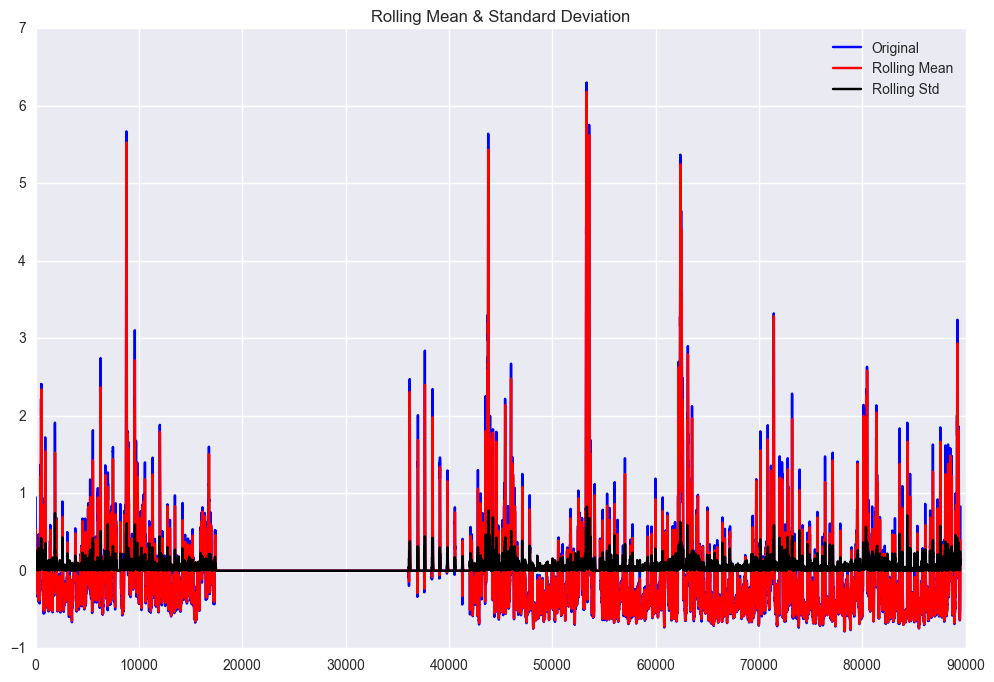

Results of Dickey-Fuller Test:
Test Statistic                -1.801830e+01
p-value                        2.700465e-30
#Lags Used                     6.600000e+01
Number of Observations Used    8.943300e+04
Critical Value (10%)          -2.566787e+00
Critical Value (5%)           -2.861572e+00
Critical Value (1%)           -3.430423e+00
dtype: float64


In [51]:
test_stationarity(Weighted_moving_avg) 

In [56]:
# the data set is not yet stationary since the test statistic is not greater than critical value

<p> Let use diffrencing to show trend </p>

In [210]:
Target_tr = Target.copy(deep=True)

In [211]:
Target_tr['date']= x_axis

In [212]:
Target_tr[1:2]

,PM10,date
1,0.950396,2007-01-02


In [213]:
Target_tr.dtypes

PM10           float64
date    datetime64[ns]
dtype: object

In [214]:
Target_tr.set_index('date',inplace=True); # set date as the index
                                          # this is important step in arima model

In [215]:
Target_tr[1:2]

,PM10
date,
2007-01-02,0.950396


In [216]:
del Target_tr.index.name # delete index name

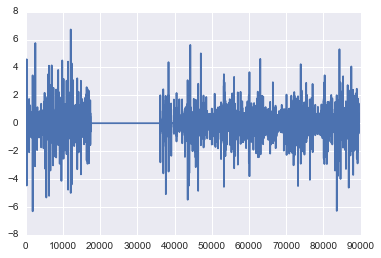

In [217]:
Target_diff = Target - Target.shift()
Target_diff.fillna(0,inplace=True)
plt.plot(Target_diff)

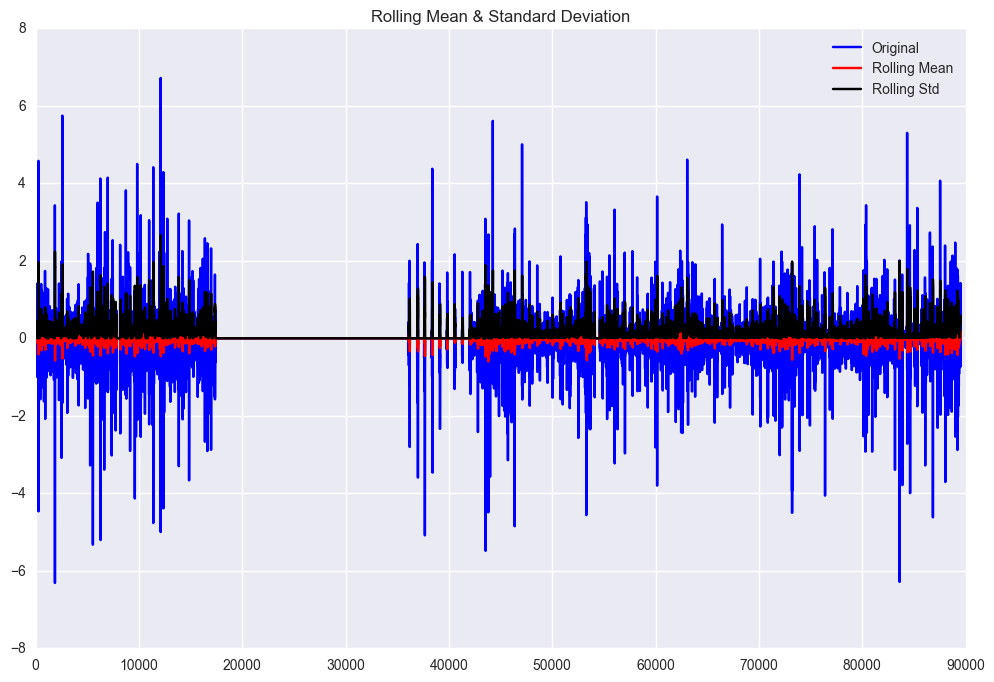

Results of Dickey-Fuller Test:
Test Statistic                   -51.780300
p-value                            0.000000
#Lags Used                        66.000000
Number of Observations Used    89433.000000
Critical Value (5%)               -2.861572
Critical Value (1%)               -3.430423
Critical Value (10%)              -2.566787
dtype: float64


In [31]:
test_stationarity(Target_diff.PM10)# the difference was very important in detrending as test statistics is now greater than
                                    #critical value

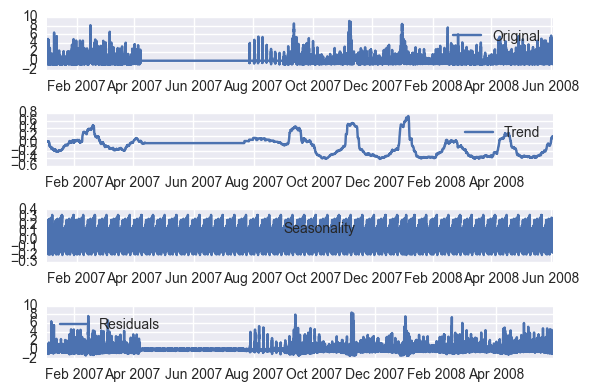

In [62]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(Target_tr.PM10,freq=2000)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(Target_tr.PM10, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

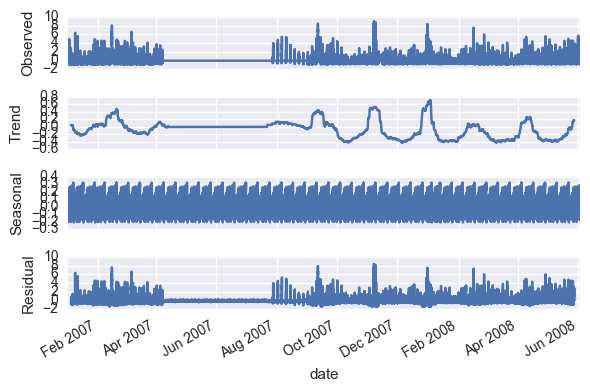

In [60]:
import statsmodels.api as sm  
import warnings
warnings.simplefilter(action = "ignore")
Target_tr.PM10.interpolate(inplace=True)  
result = sm.tsa.seasonal_decompose(Target_tr.PM10,freq=2000)  
fig = plt.figure()  
fig = result.plot()
# The residual is almost same trend as the data set
# Therefore we can just use the data set directly and not the residual

In [218]:
Target_tr_diff = Target_tr - Target_tr.shift()

In [219]:
Target_tr_diff.fillna(0,inplace=True)

# Autocorrelation plot to determine parameters for ARIMA model

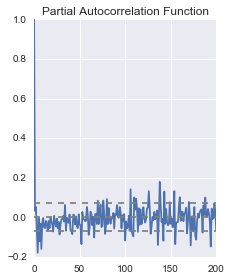

In [165]:
from statsmodels.tsa.stattools import acf, pacf
lag_pacf = pacf(Target_tr_diff[0:500], nlags=200, method='ols')
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-20.96/np.sqrt(len(Target_tr)),linestyle='--',color='gray')
plt.axhline(y=20.96/np.sqrt(len(Target_tr)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

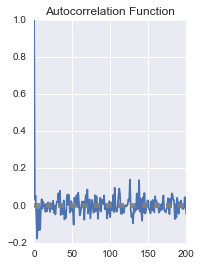

In [166]:
lag_acf = acf(Target_tr_diff[0:500], nlags=200)
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(Target_tr_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(Target_tr_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

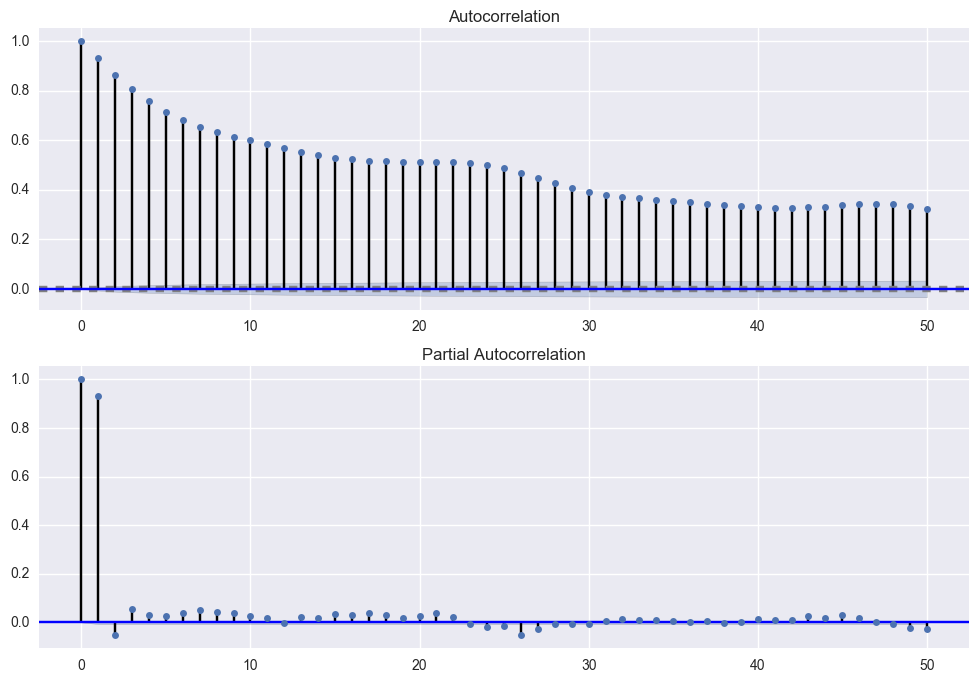

In [94]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(Target_tr_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(Target_tr_diff)),linestyle='--',color='gray')
fig = sm.graphics.tsa.plot_acf(Target_tr, lags=50, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(Target_tr, lags=50, ax=ax2)

In [220]:
from statsmodels.tsa.arima_model import ARIMA


In [221]:
# ARIMA Model

In [222]:
from statsmodels.tsa.arima_model import ARIMA


### AR model

In [223]:
Train = Target_tr[:-24].copy(deep=True)

In [224]:
Test = Target_tr[-24:].copy(deep=True)

In [225]:
Target_tr.shape

(89500, 1)

In [226]:
Train_diff = Train- Train.shift()

In [227]:
Train_diff.shape

(89476, 1)

In [228]:
Train_diff.dropna(inplace=True);
del Train_diff.index.name # 
#del Train.index.name

In [229]:
Train_diff.shape

(89475, 1)

In [230]:
Train.head()

,PM10
2007-01-02,0.950396
2007-01-02,0.950396
2007-01-02,0.470237
2007-01-02,0.470237
2007-01-02,0.270084


In [231]:
model = ARIMA(Train.values, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
#plt.plot(Train_diff.values)
print(results_AR.summary())
#plt.plot(results_AR.fittedvalues, color='red')
#locs, labels = plt.xticks()
#plt.setp(labels, rotation=90)
#plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-Train_diff.values)**2))

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                89475
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -4797.924
Method:                       css-mle   S.D. of innovations              0.255
Date:                Thu, 08 Jun 2017   AIC                           9603.847
Time:                        14:27:00   BIC                           9641.454
Sample:                             1   HQIC                          9615.317
                                                                              
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const      -7.091e-06      0.001     -0.009      0.993        -0.002     0.002
ar.L1.D.y      0.0185      0.003      5.548      0.000         0.012     0.025
ar.L2.D.y     -0.0892      0.003    -26.787      0.0

### Moving Average  model

                             ARIMA Model Results                              
Dep. Variable:                 D.PM10   No. Observations:                89475
Model:                 ARIMA(0, 1, 2)   Log Likelihood                5174.747
Method:                       css-mle   S.D. of innovations              0.228
Date:                Thu, 08 Jun 2017   AIC                         -10341.495
Time:                        14:27:08   BIC                         -10303.888
Sample:                    01-02-2007   HQIC                        -10330.024
                         - 06-02-2008                                         
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
const        -5.246e-06      0.001     -0.007      0.994        -0.001     0.001
ma.L1.D.PM10     0.0181      0.003      5.337      0.000         0.011     0.025
ma.L2.D.PM10    -0.0743      0.004    -20.61

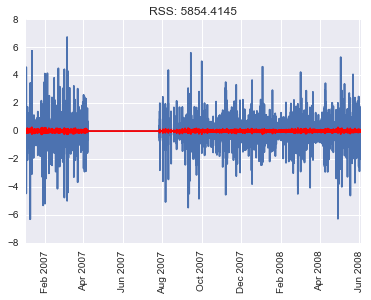

In [232]:
model = ARIMA(Train, order=(0, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(Train_diff)
print(results_MA.summary())
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-Train_diff.PM10)**2))

In [233]:
start_param =np.mean(Train.values);

In [234]:
### ARIMA model
model = ARIMA(Train, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
#plt.plot(Train_diff.values)
print(results_ARIMA.summary())
#plt.plot(results_AR.fittedvalues, color='red')
#locs, labels = plt.xticks()
#plt.setp(labels, rotation=90)
#plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-Train_diff.values)**2))

                             ARIMA Model Results                              
Dep. Variable:                 D.PM10   No. Observations:                89475
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -3045.742
Method:                       css-mle   S.D. of innovations              0.250
Date:                Thu, 08 Jun 2017   AIC                           6103.484
Time:                        14:30:37   BIC                           6159.895
Sample:                    01-02-2007   HQIC                          6120.690
                         - 06-02-2008                                         
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
const        -5.816e-06      0.000     -0.030      0.976        -0.000     0.000
ar.L1.D.PM10     0.7295      0.036     20.443      0.000         0.660     0.799
ar.L2.D.PM10     0.0966      0.033      2.96

In [102]:
# Get back to base model

In [235]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())

2007-01-02   -0.000006
2007-01-02   -0.000006
2007-01-02   -0.008982
2007-01-02    0.041428
2007-01-02    0.026034
dtype: float64


In [236]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

2007-01-02   -0.000006
2007-01-02   -0.000012
2007-01-02   -0.008994
2007-01-02    0.032435
2007-01-02    0.058469
dtype: float64


In [237]:
predictions_ARIMA_log = pd.Series(Target_tr.ix[0], index=Target_tr.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

2007-01-02   -0.000006
2007-01-02   -0.000012
2007-01-02   -0.008994
2007-01-02    0.032435
2007-01-02    0.058469
dtype: float64

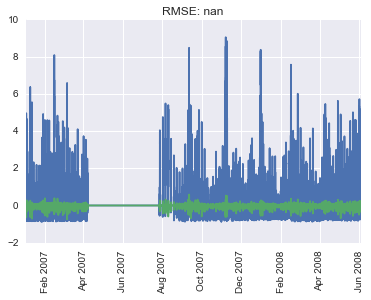

In [238]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(Target_tr)
plt.plot(predictions_ARIMA_diff)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA_diff-Target_tr.PM10)**2)/len(Target_tr)))

# Predictions
 ## AR  Model

Output of forecast   3 array output to be interpreted as : 
<p>forecast : array
Array of out of sample forecasts</p>
<p>stderr : array
Array of the standard error of the forecasts.</p>
<p>conf_int : array
2d array of the confidence interval for the forecast</p>

In [239]:
AutoregressiveModelForecast = results_AR.forecast(24)

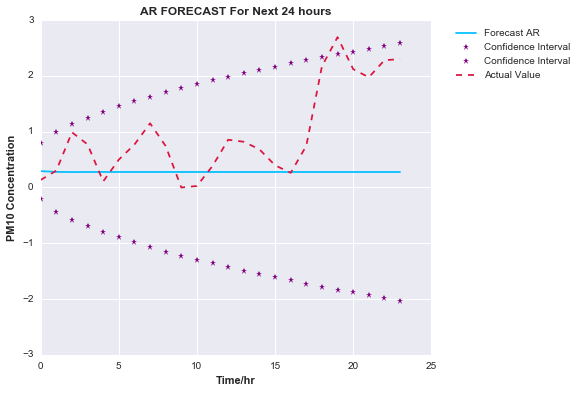

In [261]:
plt.rcParams["figure.figsize"] = (7,6)

plt.plot(AutoregressiveModelForecast[0],color='deepskyblue',label='Forecast AR') # Autoregressive model prediction for next 24 hours thats the 
plt.plot(AutoregressiveModelForecast[2],'r*',color='purple',label='Confidence Interval')
plt.plot(Target_tr.values[-24:],'--',color="crimson",label="Actual Value")
plt.title("AR FORECAST For Next 24 hours", fontweight="bold")
plt.xlabel("Time/hr",fontweight="bold" )
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.ylabel("PM10 Concentration",fontweight="bold")

In [110]:
from sklearn.metrics import mean_squared_error 

In [279]:
print("Mean Square error for Autoregressive model: ");mean_squared_error(AutoregressiveModelForecast[0],Test )**0.5 

Mean Square error for Autoregressive model: 


1.0618097736663334

In [247]:
#Error plot for AR

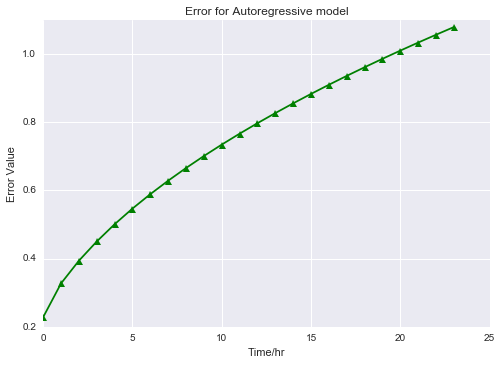

In [112]:
plt.plot(AutoregressiveModelForecast[1],'g-^')
plt.title("Error for Autoregressive model")
plt.ylabel("Error Value")
plt.xlabel("Time/hr")

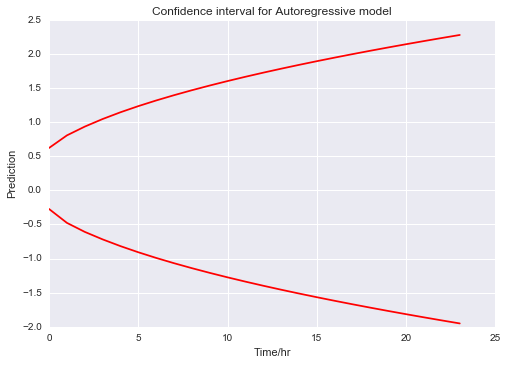

In [113]:
plt.plot(AutoregressiveModelForecast[2],'r-')
plt.title("Confidence interval for Autoregressive model")
plt.ylabel("Prediction")
plt.xlabel("Time/hr")

## MA Model: Predictiom

In [263]:
MovingAverageModelForecast = results_MA.forecast(24)

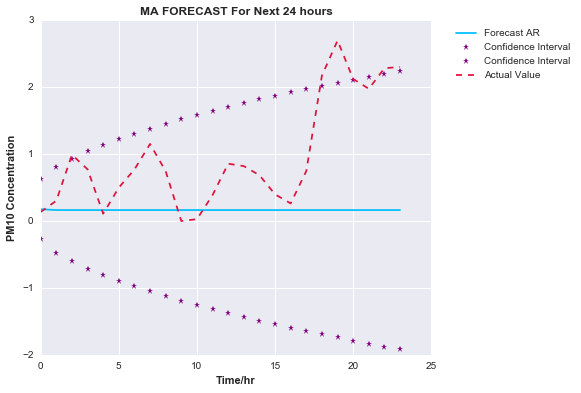

In [275]:
plt.rcParams["figure.figsize"] = (7,6)
plt.plot(MovingAverageModelForecast[0],color='deepskyblue',label='Forecast AR') # Autoregressive model prediction for next 24 hours thats the 
plt.plot(MovingAverageModelForecast[2],'r*',color='purple',label='Confidence Interval')
plt.plot(Target_tr.values[-24:],'--',color="crimson",label="Actual Value")
plt.title("MA FORECAST For Next 24 hours", fontweight="bold")
plt.xlabel("Time/hr",fontweight="bold" )
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.ylabel("PM10 Concentration",fontweight="bold")

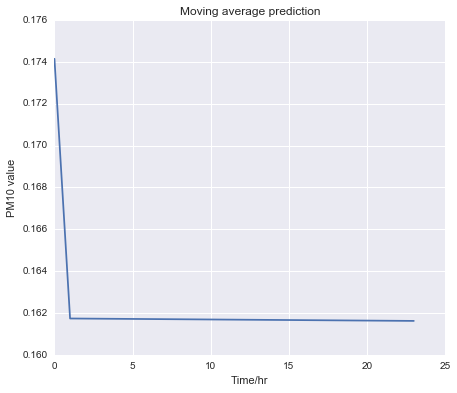

In [277]:
plt.plot(MovingAverageModelForecast[0]) 
plt.title("Moving average prediction")
plt.xlabel("Time/hr")
plt.ylabel("PM10 value")

In [278]:
print("Mean Square error for Moving Average model: ");mean_squared_error(MovingAverageModelForecast[0],Test )**0.5 

Mean Square error for Moving Average model: 


1.1393568267904643

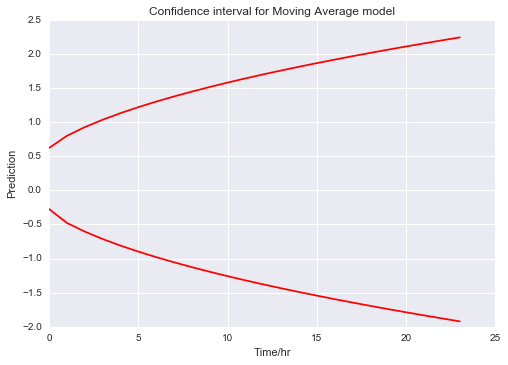

In [117]:
plt.plot(MovingAverageModelForecast[2],'r-')
plt.title("Confidence interval for Moving Average model")
plt.ylabel("Prediction")
plt.xlabel("Time/hr")

## SARIMA Model

In [273]:
ArimaModelForecast = results_ARIMA.forecast(24)

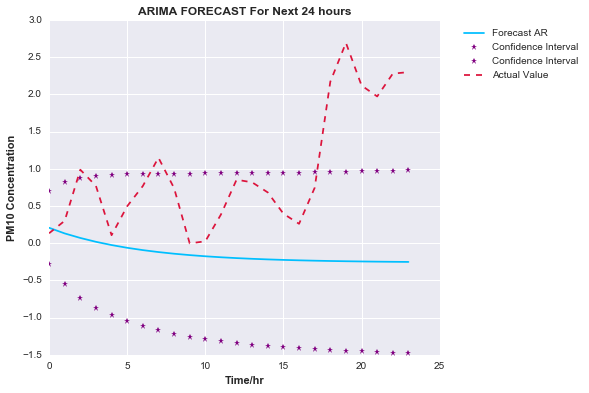

In [276]:
plt.rcParams["figure.figsize"] = (7,6)
plt.plot(ArimaModelForecast[0],color='deepskyblue',label='Forecast AR') # Autoregressive model prediction for next 24 hours thats the 
plt.plot(ArimaModelForecast[2],'r*',color='purple',label='Confidence Interval')
plt.plot(Target_tr.values[-24:],'--',color="crimson",label="Actual Value")
plt.title("ARIMA FORECAST For Next 24 hours", fontweight="bold")
plt.xlabel("Time/hr",fontweight="bold" )
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.ylabel("PM10 Concentration",fontweight="bold")

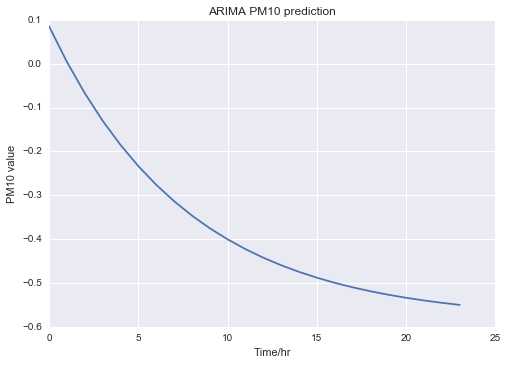

In [119]:
plt.plot(ArimaModelForecast[0]) 
plt.title("ARIMA PM10 prediction")
plt.xlabel("Time/hr")
plt.ylabel("PM10 value")

In [120]:
print("Mean Square error for  Arima model: ");mean_squared_error(ArimaModelForecast[0],Test )**0.5 

Mean Square error for  Arima model: 


1.1160752208615614

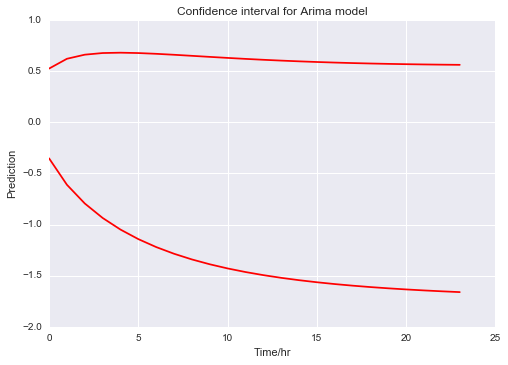

In [121]:
plt.plot(ArimaModelForecast[2],'r-')
plt.title("Confidence interval for Arima model")
plt.ylabel("Prediction")
plt.xlabel("Time/hr")

# Compute Rsquared 
This is the 

In [297]:
import scipy
def rsquared(x, y):
    """ Return R^2 where x and y are array-like."""
    
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
    return r_value**2

In [301]:
print("R-squared for Arima")
rsquared(Test.PM10.values,ArimaModelForecast[0])

R-squared for Arima


0.23302972415490053

In [303]:
print("R-squared for Moving Average")
rsquared(Test.PM10.values,MovingAverageModelForecast[0])

R-squared for Moving Average


0.049644272151101926

In [304]:
print("R-squared for AR model")
rsquared(Test.PM10.values,AutoregressiveModelForecast[0])

R-squared for AR model


0.057982504710003047

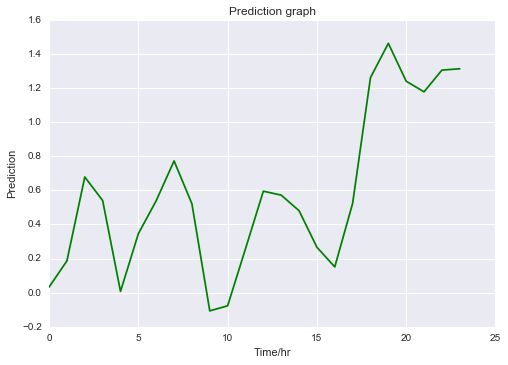

In [122]:

plt.title("Prediction graph")
plt.ylabel("Prediction")
plt.xlabel("Time/hr")

In [2]:
import tensorflow as tf

In [38]:
global_step = tf.Variable(0, trainable=False)
starter_learning_rate = 0.1
learning_rate = tf.train.exponential_decay(starter_learning_rate, global_step,
                                           1, 0.96, staircase=True)
k = tf.Variable([3.4,3.4])
l = tf.mul(k,k) 
l=tf.train.GradientDescentOptimizer(learning_rate).minimize(l)

In [39]:
sess=tf.Session()
init= tf.initialize_all_variables()
sess.run(init)
for i in range(5):
    print(sess.run(learning_rate))
    #sess.run(learning_rate.eval(session=sess))
    print(sess.run(l))
    

0.1
None
0.1
None
0.1
None
0.1
None
0.1
None
